# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.


In [4]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

In [5]:
d1 = pd.read_excel('EastWestAirlines.xlsx',1)

In [6]:
d1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [7]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
ID#                  3999 non-null int64
Balance              3999 non-null int64
Qual_miles           3999 non-null int64
cc1_miles            3999 non-null int64
cc2_miles            3999 non-null int64
cc3_miles            3999 non-null int64
Bonus_miles          3999 non-null int64
Bonus_trans          3999 non-null int64
Flight_miles_12mo    3999 non-null int64
Flight_trans_12      3999 non-null int64
Days_since_enroll    3999 non-null int64
Award?               3999 non-null int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
d1 = d1.rename({'ID#':'ID','Award?':'Award'},axis = 1)

In [9]:
d1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [10]:
d1 = d1.drop(['ID' , 'Award'],axis=1)

In [11]:
d1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


# Hierarchical¶

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
d_norm = norm_func(d1)

In [14]:
d_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


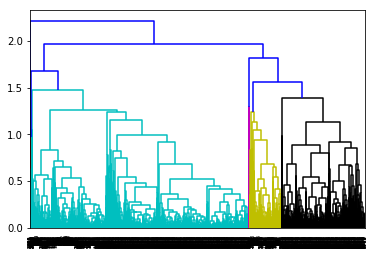

In [15]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(d_norm, method='complete'))

In [16]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [17]:
hc.fit_predict(d_norm)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [18]:
# save clusters for chart
y_hc = hc.fit_predict(d_norm)

In [19]:
d_norm['h_clusterid'] = y_hc 

In [20]:
d_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,0.016508,0.000000,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0
1,0.011288,0.000000,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0
2,0.024257,0.000000,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0
3,0.008667,0.000000,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0
4,0.057338,0.000000,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,2
5,0.009631,0.000000,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0
6,0.049808,0.000000,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0
7,0.012233,0.000000,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,0
8,0.259850,0.000000,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,2
9,0.061507,0.000000,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,0


In [21]:
 c = d_norm.h_clusterid.value_counts().rename_axis('cluster').reset_index(name ='members')

In [22]:
c

,cluster,members
0,0,2605
1,2,1376
2,1,14
3,3,4


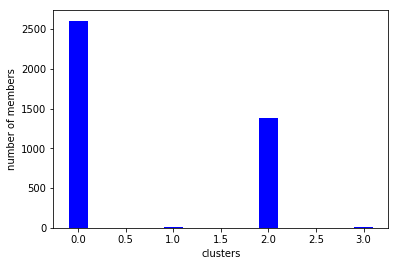

In [23]:
plt.bar(c.cluster,c.members,color = 'blue', width = 0.2)
plt.xlabel('clusters')
plt.ylabel('number of members')
plt.show()

In [24]:
#we can infer that the first cluster or cluster zero have more members followed by cluster two or third cluster and cluster four have the least number of members

# KMeans

In [25]:
from sklearn.cluster import KMeans

In [26]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(d_norm)
    iner.append(km.inertia_)

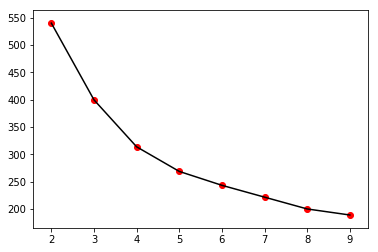

In [27]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [28]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(d_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
model_kmeans.labels_

array([3, 3, 3, ..., 2, 1, 1])

In [30]:
model_kmeans.inertia_

313.73920961785427

In [31]:
md=pd.Series(model_kmeans.labels_)

In [32]:
d1["labels"]=pd.Series(model_kmeans.labels_)

In [33]:
d1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,labels
0,28143,0,1,1,1,174,1,0,0,7000,3
1,19244,0,1,1,1,215,2,0,0,6968,3
2,41354,0,1,1,1,4123,4,0,0,7034,3
3,14776,0,1,1,1,500,1,0,0,6952,3
4,97752,0,4,1,1,43300,26,2077,4,6935,0
5,16420,0,1,1,1,0,0,0,0,6942,3
6,84914,0,3,1,1,27482,25,0,0,6994,3
7,20856,0,1,1,1,5250,4,250,1,6938,3
8,443003,0,3,2,1,1753,43,3850,12,6948,0
9,104860,0,3,1,1,28426,28,1150,3,6931,3


In [34]:
c2 = d1.labels.value_counts().rename_axis('cluster').reset_index(name ='members')

In [35]:
c2

,cluster,members
0,1,1390
1,3,1218
2,2,697
3,0,694


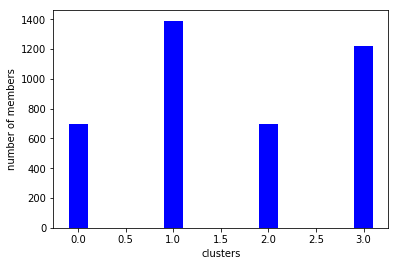

In [36]:
plt.bar(c2.cluster,c2.members,color = 'blue', width = 0.2)
plt.xlabel('clusters')
plt.ylabel('number of members')
plt.show()

In [37]:
##we can infer that the third cluster or cluster two have more members followed by cluster zero or first cluster and cluster one have the least number of members

# DBSCAN

In [38]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [39]:
#DBSCAN

dbs=DBSCAN(min_samples=7,eps=0.5)
claas_pr=dbs.fit_predict(d_norm)
#plt.scatter(d1["f1"],d1["f2"],c=claas_pr,cmap=plt.cm.Accent)


In [40]:
claas_pr

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [58]:
d1['labels'] = claas_pr

In [59]:
d1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,labels
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [60]:
g =pd.DataFrame(d1.labels.value_counts().rename_axis('cluster').reset_index(name ='members'))

In [61]:
g

,cluster,members
0,0,2562
1,1,1374
2,3,26
3,2,15
4,4,12
5,-1,10


In [62]:
d1.labels.value_counts()

 0    2562
 1    1374
 3      26
 2      15
 4      12
-1      10
Name: labels, dtype: int64

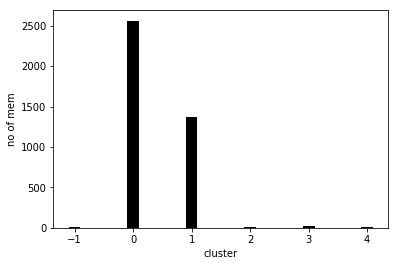

In [54]:
plt.bar(g.cluster,g.members,color = 'black', width = 0.2)
plt.xlabel('cluster')
plt.ylabel('no of mem')
plt.show()

In [55]:
##we can infer that the second cluster or cluster zero have more members followed by cluster one  and cluster minus one have the least number of members